Found 46234 files belonging to 36 classes.
Using 36988 files for training.
Found 46234 files belonging to 36 classes.
Using 9246 files for validation.


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 40, 40, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 40, 40, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 20, 20, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 20, 20, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,156 (910.77 KB)

 Trainable params: 233,156 (910.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.6449 - loss: 1.3489 - val_accuracy: 0.9089 - val_loss: 0.3317
Epoch 2/10
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9203 - loss: 0.2926 - val_accuracy: 0.9413 - val_loss: 0.2102
Epoch 3/10
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9547 - loss: 0.1603 - val_accuracy: 0.9490 - val_loss: 0.1882
Epoch 4/10
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9711 - loss: 0.1009 - val_accuracy: 0.9422 - val_loss: 0.2070
Epoch 5/10
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9754 - loss: 0.0790 - val_accuracy: 0.9446 - val_loss: 0.1903
Epoch 6/10
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9821 - loss: 0.0587 - val_accuracy: 0.9570 - val_loss: 0.1596
Epoch 7/10
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9875 - loss: 0.0463 - val_accuracy: 0.9625 - val_loss: 0.1544
Epoch 8/10
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9858 -

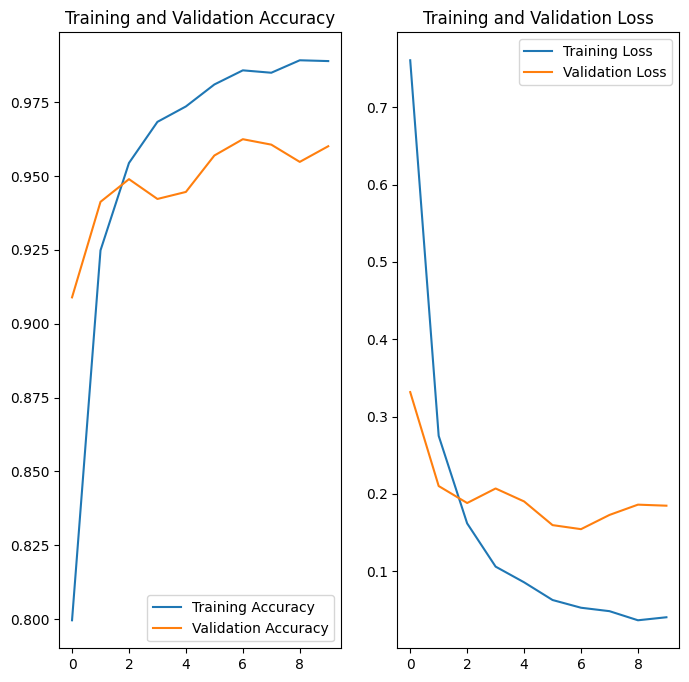

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_dir = r'./dataset/dataset-characters'

batch_size = 32
img_height = 40
img_width = 40

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

num_classes = 36

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model.save('model/model_detection_v4.keras') # Save trained model